In [1]:
from pycondor import Job, Dagman

# Load files
files = ['test1', 'test2']

dagman = Dagman(name='example_dagman')

merge = Job(name='merge',
            executable='merge.py',
            dag=dagman)

for idx, f in enumerate(files):
    processing = Job(name='processing_{}'.format(idx),
                     executable='process.py',
                     dag=dagman)
    merge.add_parent(processing)

final_processing = Dagman(name='final_processing',
                          dag=dagman)
final_processing.add_parent(merge)

Dagman(name=final_processing, n_nodes=0, dag=Dagman(name=example_dagman, n_nodes=4, submit=/Users/spx8sk/work/git/stk/scrinet/bin/dev/pipeline/pycondor), parents=[Job(name=merge, executable=merge.py, children=[Dagman(name=final_processing, n_nodes=0, dag=Dagman(name=example_dagman, n_nodes=4, submit=/Users/spx8sk/work/git/stk/scrinet/bin/dev/pipeline/pycondor), parents=[...], submit=/Users/spx8sk/work/git/stk/scrinet/bin/dev/pipeline/pycondor)], dag=Dagman(name=example_dagman, n_nodes=4, submit=/Users/spx8sk/work/git/stk/scrinet/bin/dev/pipeline/pycondor), parents=[Job(name=processing_0, executable=process.py, children=[Job(name=merge, executable=merge.py, children=[Dagman(name=final_processing, n_nodes=0, dag=Dagman(name=example_dagman, n_nodes=4, submit=/Users/spx8sk/work/git/stk/scrinet/bin/dev/pipeline/pycondor), parents=[...], submit=/Users/spx8sk/work/git/stk/scrinet/bin/dev/pipeline/pycondor)], dag=Dagman(name=example_dagman, n_nodes=4, submit=/Users/spx8sk/work/git/stk/scrinet/

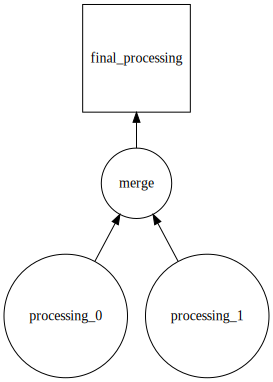

In [3]:
dagman.visualize('workflow.png')